# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I.
In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with
the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to
questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I
of the Lab.

## Task - 1

In [1]:
from os import environ as env
import keystoneclient.v3.client as ksclient

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [2]:
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

In [3]:
endpoints = keystone.service_catalog.get_endpoints()

In [4]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public':
            print('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])

service:  compute , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  identity , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9696
service:  volumev3 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v3/fc1aade83c2e49baa7498b3918560d9f
service:  image , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9292
service:  metric , region:  east-1 , public endpoint:  https://130.238.28.5:8041
service:  placement , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8780
service:  volumev2 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v2/fc1aade83c

# Questions:

## Answers:

1. Firstly we loaded environment variables (sourced before), and create an authenticated connected to openstack using `ksclient.Client()`, then we requested endpoints of different services from openstack using `keystone.service_catalog.get_endpoints()` and stored them as a dictionary. Then we traverse the dictionary to print those public endpoints. 

2. We need to add those environment variables defined in the openrc file to authenticate our connection to openstack. 

3. Modified codes are shown below: 

In [5]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public' or edp['interface'] == 'internal':
            print('service: ', endpoint, ', region: ', edp['region'], ', interface: ', edp['interface'], ', endpoint: ', edp['url'])

service:  compute , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  compute , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:8774/v2.1
service:  identity , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:5000
service:  identity , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:8000/v1
service:  cloudformation , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  orchestration , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , interface:  internal , endpoint:  http://1

4. Internal endpoints are intended for uses internal to the cloud (for example, by OpenStack services), and usually would not be accessible outside of the deployment network. The public endpoints should be TLS-enabled, and the only API endpoints accessible outside of the deployment for cloud users to operate on.

## Task - 2

In this task you need to write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Use the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/ https://docs.openstack.org/python-novaclient/pike/reference/api/index.html

Following are the functions required to accomplish the task: 

Load the required plugin:<br />
loader = loading.get_plugin_loader(...)

Create the auth object:<br />
auth = loader.load_from_options(....) 

Create session object using "auth":<br />
sess = session.Session( .... )

Create Nova Client Object:<br />
nova = client.Client( ... )

Print the Vms:<br />
nova.servers.list():

In [6]:
from novaclient import client
from keystoneauth1 import loading
from keystoneauth1 import session

In [7]:
loader = loading.get_plugin_loader('password')
auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                                username=env['OS_USERNAME'],
                                password=env['OS_PASSWORD'],
                                project_name=env['OS_PROJECT_NAME'],
                                project_domain_name=env['OS_USER_DOMAIN_NAME'],
                                project_id=env['OS_PROJECT_ID'],
                                user_domain_name=env['OS_USER_DOMAIN_NAME'])

In [8]:
sess = session.Session(auth=auth)
nova = client.Client('2.1', session=sess)
nova.servers.list()

[<Server: Ellinor_c2_2>,
 <Server: sai_lab2>,
 <Server: maha_scripted_instance>,
 <Server: vm1>,
 <Server: wezh_lab2_scripted_instance>,
 <Server: stack_with_init_script-my_instance1-7klscbke4rwm>,
 <Server: stack_with_init_script-my_instance0-rxiiliq6pxmm>,
 <Server: Vera_C2>,
 <Server: dapi1>,
 <Server: Aneysha_LAb2>,
 <Server: JS>,
 <Server: stack_meriton-my_instance1-3xdvmg7p3vcw>,
 <Server: stack_meriton-my_instance0-aqywlvtafxja>,
 <Server: Marcus_L_C2>,
 <Server: Henkeinst-200922WSL>,
 <Server: meritony>,
 <Server: Henkeinst-200922ITC>,
 <Server: wezh_lab2>,
 <Server: shreyas_spark>,
 <Server: yudu_lab11>,
 <Server: shreyas_ansible>,
 <Server: Stina_2>,
 <Server: Ellinor_c2>,
 <Server: dani_lab2_inst3>,
 <Server: max_soneback_docker>,
 <Server: vmTabeaDocker>,
 <Server: maha_c2>,
 <Server: li-ju>,
 <Server: Julie-Lab2>,
 <Server: saria_azam2>,
 <Server: Raheel2>,
 <Server: ahameed1>,
 <Server: Ego_Ass2>,
 <Server: Kev-instance>,
 <Server: mj-docker>,
 <Server: task5vm_test>,
 <S

## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several
times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write
throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the
experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting
graphs and a description of your experiment in the report.

### Answers
To measure the speed of the volume, a brand new volume is created and attached to the virtual machine, but yet to be formated and mounted. Firstly shell command is used to initialize the volume. 

In [24]:
!sudo mkfs.ext3 /dev/vde
!sudo mkdir /testvol
!sudo mount /dev/vde /testvol

mke2fs 1.44.1 (24-Mar-2018)
Creating filesystem with 262144 4k blocks and 65536 inodes
Filesystem UUID: 7759dfb0-1621-4441-9d39-0e72ccbcf98c
Superblock backups stored on blocks: 
	32768, 98304, 163840, 229376

Allocating group tables: 0/  done                            
Writing inode tables: 0/  done                            
Creating journal (8192 blocks): done
Writing superblocks and filesystem accounting information: 0/  done



Following 2 functions are defined, to test writing speed and reading speed from disk. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from time import perf_counter as time
import statistics

In [2]:
def write_test(file_name, block_size, blocks_count):
    os.mkdir(file_name)
    # $blocks_count files are written on the disk, and the size of each file is $block_size
    # all files for testing are saved in the directory named $file_name
    result = []
    for i in range(blocks_count):
        f = os.open(file_name+"/tmp"+str(i), os.O_CREAT | os.O_WRONLY, 0o777)  # low-level I/O
        buff = os.urandom(block_size)
        start = time()
        os.write(f, buff)
        os.fsync(f)  # force write to disk
        t = time() - start
        result.append(t)
        os.close(f)
    # a list of time cost for each file will be returned for further analysis
    return result

In [3]:
def read_test(file_name, block_size, blocks_count):
    # Files are written by function write_test(...) will be read one by one to test disk reading speed
    result = []
    for i in range(blocks_count):
        f = os.open(file_name+"/tmp"+str(i), os.O_RDONLY, 0o7777)  # low-level I/O
        start = time()
        buff = os.read(f, block_size)
        t = time() - start
        result.append(t)
        os.close(f)
    return result

In [4]:
def clean(file_name):
    # to clean temp files
    os.system("rm -rf "+file_name)

#### A: Time cost distribution for 10M-file writing and reading

To measure the speed of the volume for 10M files, 50 tests are done and the distribution of writing and reading speed is shown as following

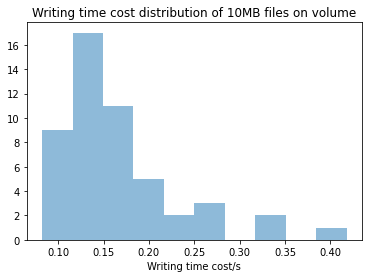

In [5]:
block_size = 10*1024*1024 # Size: 10MB
count = 50 # Number of tests: 50
temp_name = "/testvol/tmp"

write_results = write_test(temp_name, block_size, count)

n, bins, patches = plt.hist(write_results, 10, alpha=0.5)
plt.xlabel('Writing time cost/s')
plt.title('Writing time cost distribution of 10MB files on volume')
plt.show()

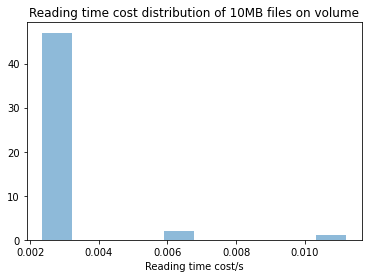

In [6]:
read_results = read_test(temp_name, block_size, count)

n, bins, patches = plt.hist(read_results, 10, alpha=0.5)
plt.xlabel('Reading time cost/s')
plt.title('Reading time cost distribution of 10MB files on volume')
plt.show()
clean(temp_name)

As we can see that, generally reading speed is far faster than writing speed, but sometimes reading speed is low as well. The reason for this is that Linux kernel reserves cache for recent files. In most cases, recent files can be found in cache, and reading from cache is very fast (4-5GB/s). However, in some cases, files to be read are not in cache and disk reading is required, which takes much more time. But for writing, as we used fsync() function to force the kernel write files to disk, writing speed is much slower comparing with reading speed, because it involves disk IO each time. 

#### B: Speed test for different-sized files writing and reading

To get a more convincing result, multiple tests are done for files of each size. For small-sized files (10KB and 100KB), 100 tests are done, for files of 1MB and 10MB, 50 tests are done and for 100MB files, 5 tests are conducted. Figure for writing and reading speed for different-sized files are attached below. 

In [7]:
block_sizes = [10240, 102400, 1024*1024, 10*1024*1024, 100*1024*1024]
blocks = [100, 100, 50, 50, 5]

In [8]:
writings = []
readings = []
for i in range(5): 
    entire_size = block_sizes[i]*blocks[i]
    write_results = write_test(temp_name, block_sizes[i], blocks[i])
    writings.append(entire_size/1024/1024/sum(write_results))
    read_results = read_test(temp_name, block_sizes[i], blocks[i])
    readings.append(entire_size/1024/1024/sum(read_results))
    clean(temp_name)

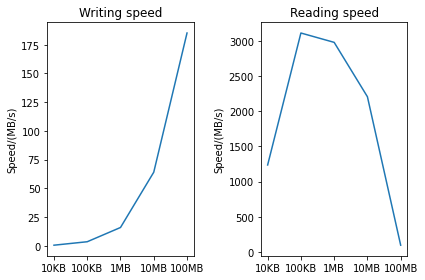

In [9]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
axs[0].plot(writings)
axs[0].set_title('Writing speed')
axs[0].set_xticks([0,1,2,3,4])
axs[0].set_xticklabels(['10KB','100KB','1MB','10MB', '100MB'])
axs[0].set_ylabel('Speed/(MB/s)')
axs[1].plot(readings)
axs[1].set_title('Reading speed')
axs[1].set_xticks([0,1,2,3,4])
axs[1].set_xticklabels(['10KB','100KB','1MB','10MB', '100MB'])
axs[1].set_ylabel('Speed/(MB/s)')
plt.show()